Multi class Text Classification Model to Predict Desired Job Category

In [1]:
from ScrapeLinkedin import *
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
print(Skills)

['Linux', 'HTML', 'Image Processing', 'Artificial Intelligence', 'Big Data Analytics', 'Project Management', 'E-commerce SEO', 'Entrepreneurship', 'Social Entrepreneurship', 'Mobile Application Development', 'Business Strategy', 'Consulting', 'Cyber-security', 'Information Security Consultancy', 'Online Marketing Analysis', 'PHP', 'IT Consulting', 'Social Media Consulting', 'E-commerce Consulting', 'Start-up Consulting']


Retrieve and read the Dataset

In [3]:
path = "new_dataset.csv" # Define the path

In [4]:
#read csv file
Df_dataset = pd.read_csv(path)

In [5]:
#To view the first few rows,
Df_dataset.head()

,index,category,role,clean_skills
0,1,Executive Leadership,Chief information officer (CIO),"['Strategic leadership','Business acumen','IT ..."
1,2,Executive Leadership,Chief information security officer,"['Cybersecurity expertise','Information securi..."
2,3,Executive Leadership,Chief technology officer (CTO),"['Technology trends knowledge','Strategic plan..."
3,4,Management and Strategy,IT manager,"['Team management and leadership','Project man..."
4,5,Management and Strategy,IT director,"['Strategic planning and vision','IT governanc..."


In [6]:
#To view the last few rows,
Df_dataset.tail()

,index,category,role,clean_skills
66,67,Product and Project Management,Technical product manager,['Proficiency in product management methodolog...
67,68,Product and Project Management,Product manager,['Proficiency in product management methodolog...
68,69,Product and Project Management,Project manager,['Proficiency in project management methodolog...
69,70,Managent and Strategy,Program manager,['Proficiency in program management methodolog...
70,71,Managent and Strategy,Portfolio manager,['Proficiency in portfolio management methodol...


In [7]:
#get the column headings of the data set
Df_dataset.columns.values

array(['index', 'category', 'role', 'clean_skills'], dtype=object)

In [8]:
#Explore the data types of the columns
Df_dataset.dtypes

index            int64
category        object
role            object
clean_skills    object
dtype: object

In [9]:
#check for the columns which have missing values more than 30%
col_num=0
TotalObjects =Df_dataset.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in Df_dataset:
    nullCount =Df_dataset[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 30 :
       col_num=col_num+1
       Df_dataset.drop(x, axis=1,inplace=True)
       print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !") 

Column					 Null Values%
A total of 0 deleted !


In [10]:
#To get an idea about the null values
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         71 non-null     int64 
 1   category      71 non-null     object
 2   role          71 non-null     object
 3   clean_skills  71 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


In [11]:
#Getting the null value count
Df_dataset.isnull().sum()

index           0
category        0
role            0
clean_skills    0
dtype: int64

In [12]:
pd.unique(Df_dataset['category'].values) 

array(['Executive  Leadership', 'Management and Strategy',
       'Architecture and Design', 'Insfastructure and Operations',
       'Development and Engineering', 'Data Management',
       'Data and Analytics', 'Security and Privacy',
       'Software Development and Engineering',
       'User Experience and Design', 'Product and Project Management',
       'Managent and Strategy'], dtype=object)

In [13]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [14]:
# loading data
df = pd.read_csv('new_dataset.csv') # create a dataframe to store data
print(df.shape)

(71, 4)


In [15]:
df.head(3).T

,0,1,2
index,1,2,3
category,Executive Leadership,Executive Leadership,Executive Leadership
role,Chief information officer (CIO),Chief information security officer,Chief technology officer (CTO)
clean_skills,"['Strategic leadership','Business acumen','IT ...","['Cybersecurity expertise','Information securi...","['Technology trends knowledge','Strategic plan..."


In [16]:
# Create a new dataframe with two columns
df1 = df[['clean_skills', 'category']].copy() #create a dataframe to store skills and category column
df1

,clean_skills,category
0,"['Strategic leadership','Business acumen','IT ...",Executive Leadership
1,"['Cybersecurity expertise','Information securi...",Executive Leadership
2,"['Technology trends knowledge','Strategic plan...",Executive Leadership
3,"['Team management and leadership','Project man...",Management and Strategy
4,"['Strategic planning and vision','IT governanc...",Management and Strategy
...,...,...
66,['Proficiency in product management methodolog...,Product and Project Management
67,['Proficiency in product management methodolog...,Product and Project Management
68,['Proficiency in project management methodolog...,Product and Project Management
69,['Proficiency in program management methodolog...,Managent and Strategy


In [17]:
print(df1.shape)
df1.head(3).T

(71, 2)


,0,1,2
clean_skills,"['Strategic leadership','Business acumen','IT ...","['Cybersecurity expertise','Information securi...","['Technology trends knowledge','Strategic plan..."
category,Executive Leadership,Executive Leadership,Executive Leadership


In [18]:
pd.DataFrame(df1.category.unique()).values   # check for unique categories

array([['Executive  Leadership'],
       ['Management and Strategy'],
       ['Architecture and Design'],
       ['Insfastructure and Operations'],
       ['Development and Engineering'],
       ['Data Management'],
       ['Data and Analytics'],
       ['Security and Privacy'],
       ['Software Development and Engineering'],
       ['User Experience and Design'],
       ['Product and Project Management'],
       ['Managent and Strategy']], dtype=object)

In [19]:
pd.DataFrame(df1.category.unique())  #24 unique job categories

,0
0,Executive Leadership
1,Management and Strategy
2,Architecture and Design
3,Insfastructure and Operations
4,Development and Engineering
5,Data Management
6,Data and Analytics
7,Security and Privacy
8,Software Development and Engineering
9,User Experience and Design


In [20]:
# Create a new column 'category_id' with encoded categories 
df1['category_id'] = df1['category'].factorize()[0]
category_id_df = df1[['category', 'category_id']].drop_duplicates()

In [21]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
# Created new dataframe
df1.head()

,clean_skills,category,category_id
0,"['Strategic leadership','Business acumen','IT ...",Executive Leadership,0
1,"['Cybersecurity expertise','Information securi...",Executive Leadership,0
2,"['Technology trends knowledge','Strategic plan...",Executive Leadership,0
3,"['Team management and leadership','Project man...",Management and Strategy,1
4,"['Strategic planning and vision','IT governanc...",Management and Strategy,1


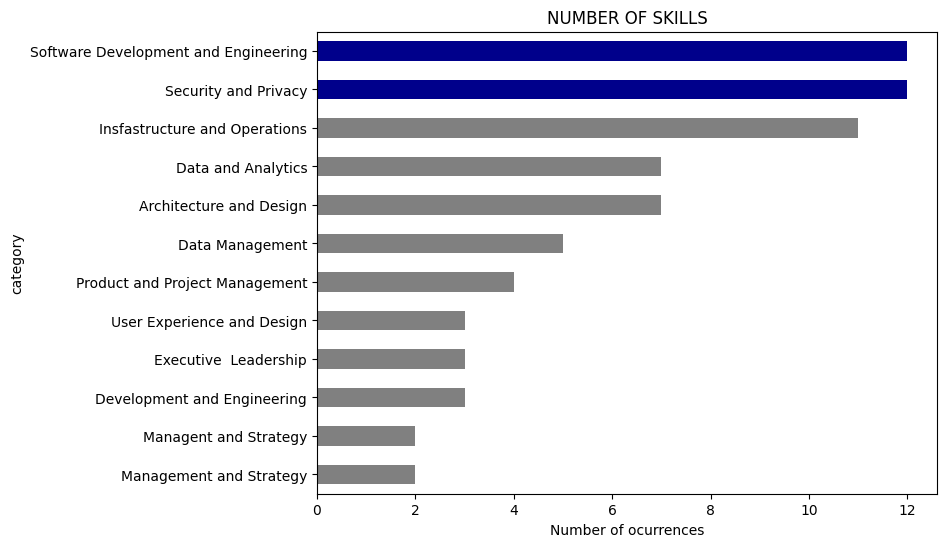

In [22]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df1.groupby('category').clean_skills.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF SKILLS')
plt.xlabel('Number of ocurrences', fontsize = 10);

Text Preprocessing

In [23]:
#transform texts into vectors using TFIDF
#min_df - remove the words which has occurred in less than ‘min_df’ number of files.
#sublinear_tf - If true -> scale the frequency in logarythemic scale
#Stop words - remove stop words that predefined in english language
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),  # consider both unigrams and bigrams
                        stop_words='english')
# Transform each complaint into a vector
features = tfidf.fit_transform(df1.clean_skills).toarray()
labels = df1.category_id
print("Each of the %d skill is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 71 skill is represented by 204 features (TF-IDF score of unigrams and bigrams)


In [24]:
# Finding the three most correlated terms with each of the product categories
N = 3 # top 3 most correlated terms
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])  # computes the chi-squared statistic and p-values for each feature against the selected labels.
  feature_names = np.array(tfidf.get_feature_names_out())[indices]  # chi-squared scores in ascending order. 

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> Architecture and Design:
  * Most Correlated Unigrams are: computing, architecture, solutions
  * Most Correlated Bigrams are: cloud computing, security compliance, performance optimization
n==> Data Management:
  * Most Correlated Unigrams are: sql, database, tuning
  * Most Correlated Bigrams are: collaboration development, development teams, performance monitoring
n==> Data and Analytics:
  * Most Correlated Unigrams are: querying, data, visualization
  * Most Correlated Bigrams are: understanding database, sql querying, data visualization
n==> Development and Engineering:
  * Most Correlated Unigrams are: requirements, assurance, business
  * Most Correlated Bigrams are: languages python, collaboration stakeholders, quality assurance
n==> Executive  Leadership:
  * Most Correlated Unigrams are: leadership, strategic, technology
  * Most Correlated Bigrams are: security tools, risk assessment, project management
n==> Insfastructure and Operations:
  * Most Correlated Unigrams a

Split the data to train and test sets

In [25]:
#  for train - 75% of data 
X = df1['clean_skills'] # Collection of documents
y = df1['category'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 0)

List and loop thorugh the list for classifications models

In [26]:
from xgboost import XGBClassifier
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
]

In [27]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [28]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.466667
1,RandomForestClassifier,1,0.714286
2,RandomForestClassifier,2,0.714286
3,RandomForestClassifier,3,0.428571
4,RandomForestClassifier,4,0.571429
5,LinearSVC,0,0.466667
6,LinearSVC,1,0.714286
7,LinearSVC,2,0.857143
8,LinearSVC,3,0.428571
9,LinearSVC,4,0.714286


In [29]:
mean_accuracy = cv_df.groupby('model_name')['accuracy'].mean()
std_deviation = cv_df.groupby('model_name')['accuracy'].std()

for model_name, accuracy, std_dev in zip(mean_accuracy.index, mean_accuracy, std_deviation):
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {accuracy:.3f}")
    print(f"Standard Deviation: {std_dev:.3f}")
    print()


Model: LinearSVC
Mean Accuracy: 0.636
Standard Deviation: 0.182

Model: LogisticRegression
Mean Accuracy: 0.579
Standard Deviation: 0.160

Model: MultinomialNB
Mean Accuracy: 0.550
Standard Deviation: 0.122

Model: RandomForestClassifier
Mean Accuracy: 0.579
Standard Deviation: 0.134

Model: XGBClassifier
Mean Accuracy: 0.437
Standard Deviation: 0.108



In [30]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# List of models including LinearSVC
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier()
]

# Hyperparameter grid for LinearSVC
svc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

# Loop through models and perform cross-validation
cv_results = []
for model in models:
    model_name = model.__class__.__name__
   
    if model_name == 'LinearSVC':
        param_grid = svc_param_grid
    else:
        param_grid = {}

    grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=CV)
    accuracies = cross_val_score(grid_model, features, labels, scoring='accuracy', cv=CV)
    
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    cv_results.append((model_name, mean_accuracy, std_accuracy))

# Display results
for model_name, mean_accuracy, std_accuracy in cv_results:
    print(f"Model: {model_name}")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}\n")


Model: RandomForestClassifier
Mean Accuracy: 0.5790
Standard Deviation of Accuracy: 0.1199

Model: LinearSVC
Mean Accuracy: 0.6638
Standard Deviation of Accuracy: 0.1314

Model: MultinomialNB
Mean Accuracy: 0.5505
Standard Deviation of Accuracy: 0.1094

Model: LogisticRegression
Mean Accuracy: 0.5790
Standard Deviation of Accuracy: 0.1432

Model: XGBClassifier
Mean Accuracy: 0.4371
Standard Deviation of Accuracy: 0.0963



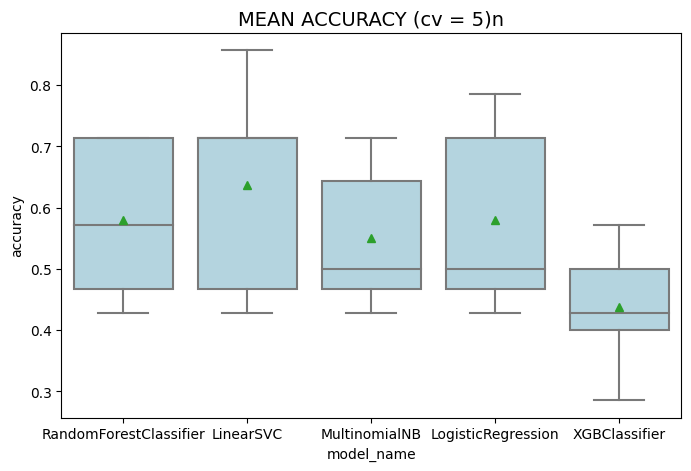

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

Text Classification model evaluation

In [32]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df1.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

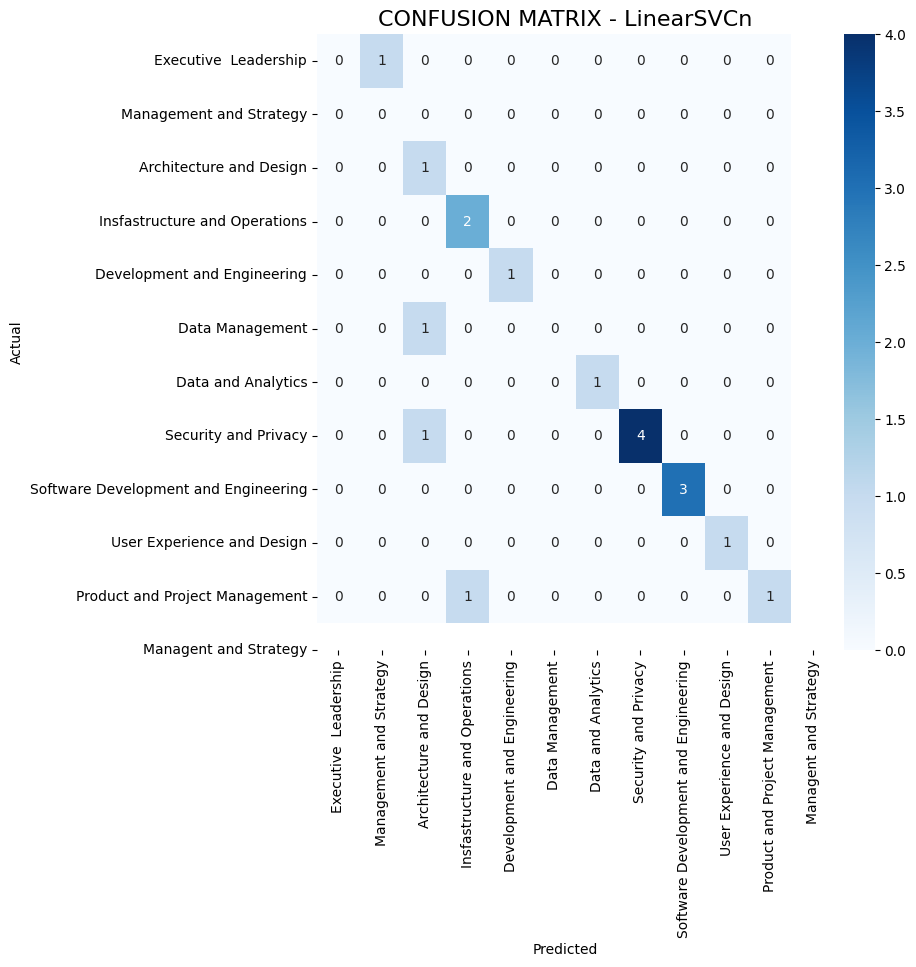

In [33]:
#confusion matrix to check miss classified predictions
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values, 
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

Prediction

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [36]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [37]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [76]:
# # Open the file in read mode
# with open('output.txt', 'r') as file:
#     # Read the lines from the file
#     lines = file.readlines()

# # Remove newline characters and whitespace from each line
# lines = [line.strip() for line in lines]

# # Process the lines and store them in a list
# my_list = lines

# # Print the list
# print(my_list)

['Linux', 'HTML', 'Image Processing', 'Artificial Intelligence', 'Big Data Analytics', 'Project Management', 'E-commerce SEO', 'Entrepreneurship', 'Social Entrepreneurship', 'Mobile Application Development', 'Business Strategy', 'Consulting', 'Cyber-security', 'Information Security Consultancy', 'Online Marketing Analysis', 'PHP', 'IT Consulting', 'Social Media Consulting', 'E-commerce Consulting', 'Start-up Consulting']


In [38]:
#my_list = ['item1', 'item2', 'item3']

# Convert the list to a string with comma-separated elements
list_string = ', '.join(Skills)

print(list_string)

Linux, HTML, Image Processing, Artificial Intelligence, Big Data Analytics, Project Management, E-commerce SEO, Entrepreneurship, Social Entrepreneurship, Mobile Application Development, Business Strategy, Consulting, Cyber-security, Information Security Consultancy, Online Marketing Analysis, PHP, IT Consulting, Social Media Consulting, E-commerce Consulting, Start-up Consulting


In [39]:
skills = list_string
print(model.predict(fitted_vectorizer.transform([skills])))

['Executive  Leadership']


In [40]:
import pickle

# Make pickle file of our model

pickle.dump(model, open("model.pkl", "wb"))

In [41]:
model = pickle.load(open("model.pkl", "rb"))

In [42]:
skills = list_string
print(model.predict(fitted_vectorizer.transform([skills])))

['Executive  Leadership']
